### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [394]:
data = pd.read_csv('data/coupons.csv')

In [395]:
pd.set_option('display.max_columns', None)

In [396]:
data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [397]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [398]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Investigated the data and found that car, Bar, CoffeeHouse, CarrayAway, ResturantLessThan20 and Restaurant20To50 have some NaN data. Was tempted to drop those but the comprise of a very big subset of the data so dedciding to keep them. Instead, we will replace the NaN with text NA so that we can perform analysis. There are some cosmetic changes like typo fix for passanger, removal of () from string for passenger column which also we will be performing as part of cleaning. Also, we should convert the age, income and temperature features to numeric for comaprision based analysis which we will be having further down the road. 

3. Decide what to do about your missing data -- drop, replace, other...

In [399]:
data = data.replace(np.nan, 'NA')

In [400]:
data = data.rename(columns = {'passanger' : 'passenger'})

In [401]:
data.loc[data['passenger'] == 'Friend(s)', 'passenger'] = 'Friends'
data.loc[data['passenger'] == 'Kid(s)', 'passenger'] = 'Kids'

In [402]:
data.loc[data['income'] == 'Less than $12500', 'income'] = '12499'
data.loc[data['income'] == '$12500 - $24999', 'income'] = '12500'
data.loc[data['income'] == '$25000 - $37499', 'income'] = '25000'
data.loc[data['income'] == '$37500 - $49999', 'income'] = '37500'
data.loc[data['income'] == '$50000 - $62499', 'income'] = '50000'
data.loc[data['income'] == '$62500 - $74999', 'income'] = '62500'
data.loc[data['income'] == '$75000 - $87499', 'income'] = '75000'
data.loc[data['income'] == '$87500 - $99999', 'income'] = '87500'
data.loc[data['income'] == '$100000 or More', 'income'] = '100000'

data['income'] = pd.to_numeric(data['income'])

In [403]:
data.loc[data['age'] == '50plus', 'age'] = '51'
data.loc[data['age'] == 'below21', 'age'] = '20'

data['age'] = pd.to_numeric(data['age'])

In [404]:
data['temperature'] = pd.to_numeric(data['temperature'])

In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  int64 
 14  car                   12684 non-null  object
 15  Bar                   12684 non-null

Fixed passenger column name, replaced passenger data, converted age, income, temperature and replaced all NaN with 'NA'

4. What proportion of the total observations chose to accept the coupon? 



In [406]:
accepted_ratio = data.query('Y==1')['Y'].count()/ data['Y'].count()
accepted_ratio

0.5684326710816777

So, from the above calculation it is visible that around 57% of the observations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

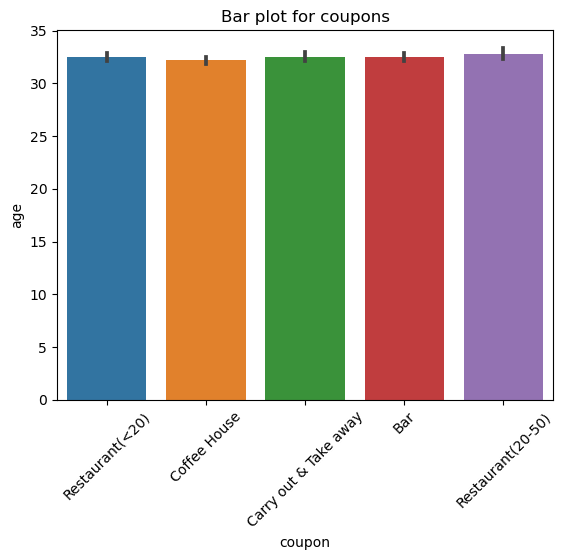

In [407]:
sns.barplot(data=data, x="coupon", y="age").set(title = 'Bar plot for coupons')
plt.xticks(rotation=45)

plt.savefig('images/coupon_bar.png')

6. Use a histogram to visualize the temperature column.

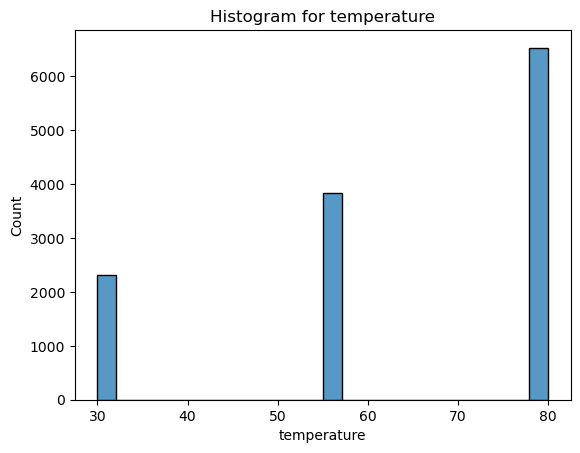

In [408]:
sns.histplot(data=data['temperature']).set(title = 'Histogram for temperature')

plt.savefig("images/temperature_hist.png")

We can see there are only 3 kinds of temperature available in the data (30F, 55F and 80F).

In [409]:
data.groupby('temperature')['temperature'].count()

temperature
30    2316
55    3840
80    6528
Name: temperature, dtype: int64

Above `groupby` proves that our histogram is correct

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [410]:
bar_coupons = data.query('coupon == "Bar"')
bar_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kids,Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,NA,never,never,NA,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,NA,never,never,NA,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,NA,never,never,NA,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friends,Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,62500,NA,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,62500,NA,never,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friends,Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,75000,NA,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friends,Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,75000,NA,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,75000,NA,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,75000,NA,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [411]:
bar_coupons.query('Y == 1')['Y'].count()/ bar_coupons['Y'].count()

0.41001487357461575

41% of the population accepts bar coupons

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [412]:
less_than_eq3 = ['never','less1','1~3']
people_who_went_leq3 = bar_coupons.query('Bar in @less_than_eq3')
acceptance_rate_for_leq3 = people_who_went_leq3.query('Y == 1')['Y'].count()  / bar_coupons.query('Y == 1')['Y'].count()
print(acceptance_rate_for_leq3)

more_than_3 = ['4~8','gt8']
people_who_went_gt3 = bar_coupons.query('Bar in @more_than_3')
acceptance_rate_for_gt3 = people_who_went_gt3.query('Y == 1')['Y'].count()  / bar_coupons.query('Y == 1')['Y'].count()
print(acceptance_rate_for_gt3)


0.8053204353083434
0.18500604594921402


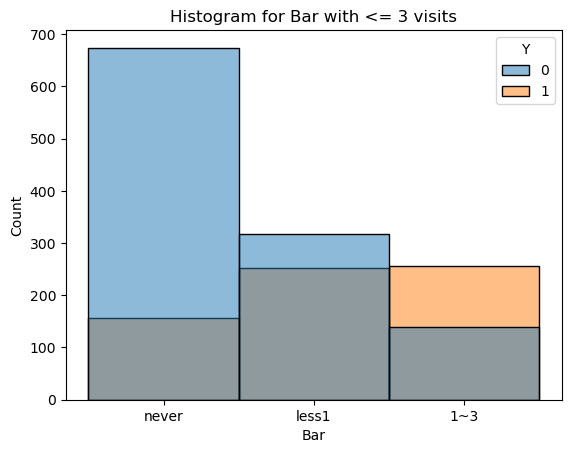

In [413]:
sns.histplot(data=people_who_went_leq3, x='Bar', hue='Y').set(title = 'Histogram for Bar with <= 3 visits')

plt.savefig("images/bar_hist_1.png")

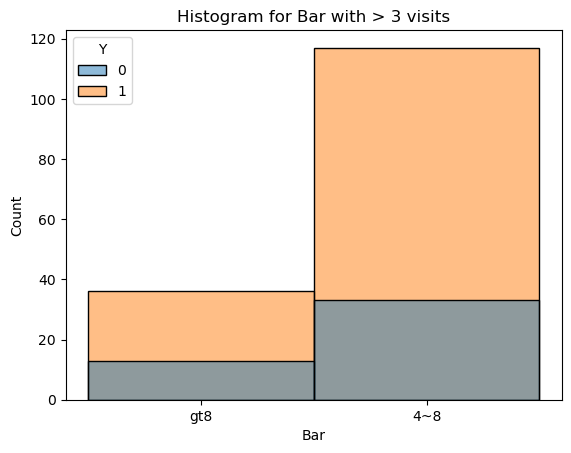

In [414]:
sns.histplot(data=people_who_went_gt3, x='Bar', hue='Y').set(title = 'Histogram for Bar with > 3 visits')
plt.savefig("images/bar_hist_2.png")

80% of the population accepting coupon comprises of people who visited bar less than 3.

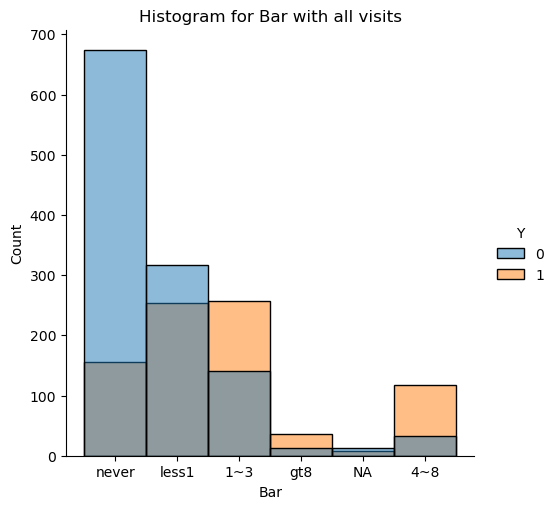

In [415]:
sns.displot(bar_coupons, x='Bar', hue='Y').set(title = 'Histogram for Bar with all visits')
plt.savefig("images/bar_hist_3.png")

As we can see in the above displot, the distribution spreads more for coupons accepted.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


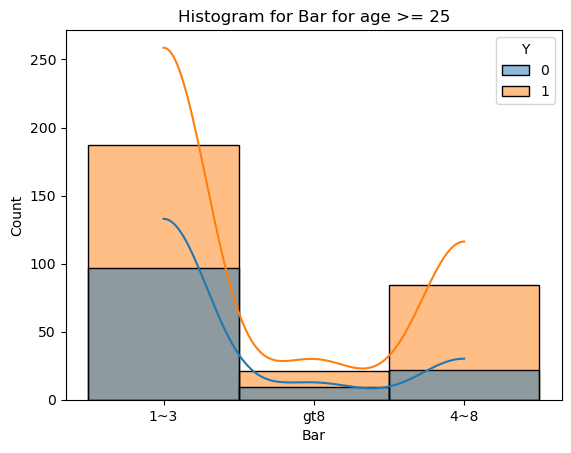

In [416]:
more_than_once = ['1~3','4~8','gt8']
sns.histplot(data=bar_coupons.query('Bar in @more_than_once and age >= 25'), x='Bar', hue='Y', kde=True).set(title = 'Histogram for Bar for age >= 25')
plt.savefig("images/bar_hist_4.png")

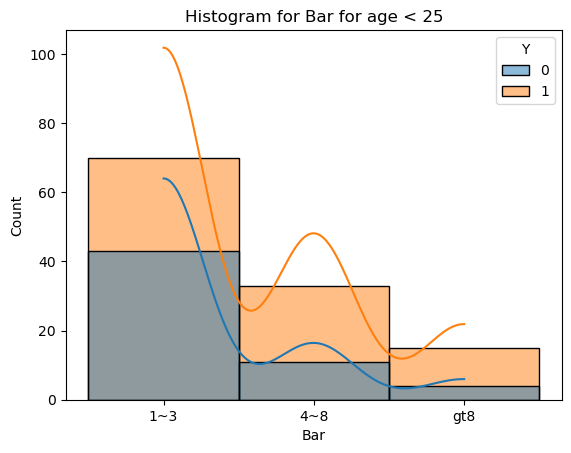

In [417]:
more_than_once = ['1~3','4~8','gt8']
sns.histplot(data=bar_coupons.query('Bar in @more_than_once and age < 25'), x='Bar', hue='Y', kde=True).set(title = 'Histogram for Bar for age < 25')
plt.savefig("images/bar_hist_5.png")

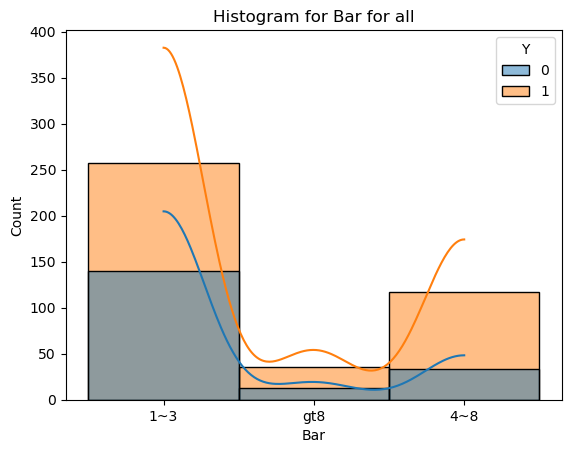

In [418]:
more_than_once = ['1~3','4~8','gt8']
sns.histplot(data=bar_coupons.query('Bar in @more_than_once'), x='Bar', hue='Y', kde=True).set(title = 'Histogram for Bar for all')
plt.savefig("images/bar_hist_6.png")

As we can see in the above histograms, there is no difference between distribution of population for age > 25 and distribution for all.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [419]:
more_than_once = ['1~3','4~8','gt8']
passengers = ['Friends','Partner']
occupation_to_exclude = ['Farming Fishing & Forestry']
people_above_25 = bar_coupons.query('Bar in @more_than_once and passenger in @passengers and occupation not in @occupation_to_exclude')
people_above_25_acceptance_ratio = people_above_25.query('Y == 1')['Y'].count() / bar_coupons.query('Y == 1')['Y'].count()
print(people_above_25_acceptance_ratio)


0.16928657799274485


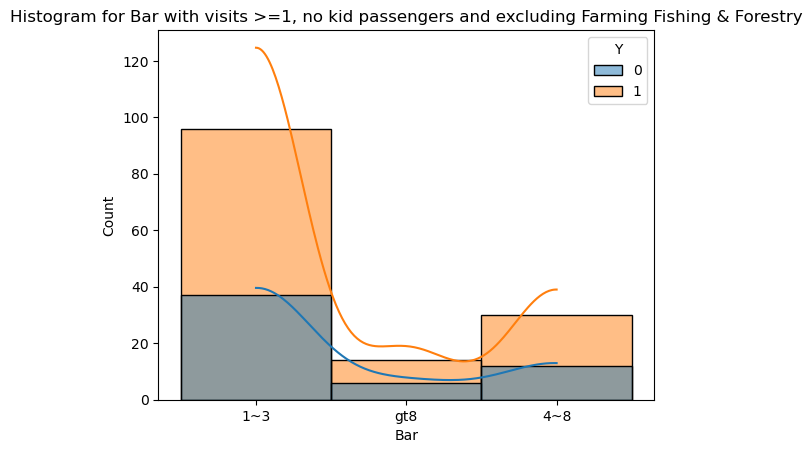

In [420]:
more_than_once = ['1~3','4~8','gt8']
passengers = ['Friends','Partner']
occupation_to_exclude = ['Farming Fishing & Forestry']
people_above_25 = bar_coupons.query('Bar in @more_than_once and passenger in @passengers and occupation not in @occupation_to_exclude')
sns.histplot(data=people_above_25, x='Bar', hue='Y', kde=True).set(title = 'Histogram for Bar with visits >=1, no kid passengers and excluding Farming Fishing & Forestry')
plt.savefig("images/bar_hist_7.png")

Again, as we can see in the above distribution, it is pretty similar to our previous distribution without passengers and occupation

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [421]:
more_than_once = ['1~3','4~8','gt8']
marital_status_to_be_excluded = ['Widowed']
passengers = ['Friends','Partner']
cheap_restaurant_trips = ['4~8','gt8']
people_visiting_bar = bar_coupons.query('(Bar in @more_than_once and passenger in @passengers and maritalStatus not in @marital_status_to_be_excluded) or (Bar in @more_than_once and age < 30) or (RestaurantLessThan20 in @cheap_restaurant_trips and income < 50000)')
people_visiting_bar_acceptance_ratio = people_visiting_bar.query('Y == 1')['Y'].count() / bar_coupons.query('Y == 1')['Y'].count()
print(people_visiting_bar_acceptance_ratio)

0.4570737605804111


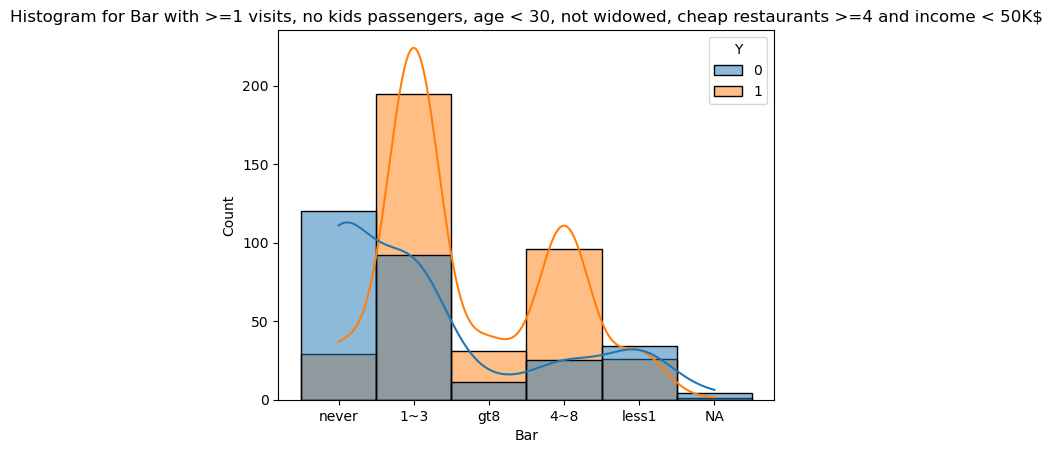

In [422]:
more_than_once = ['1~3','4~8','gt8']
marital_status_to_be_excluded = ['Widowed']
passengers = ['Friends','Partner']
cheap_restaurant_trips = ['4~8','gt8']
people_visiting_bar = bar_coupons.query('(Bar in @more_than_once and passenger in @passengers and maritalStatus not in @marital_status_to_be_excluded) or (Bar in @more_than_once and age < 30) or (RestaurantLessThan20 in @cheap_restaurant_trips and income < 50000)')
sns.histplot(data=people_visiting_bar, x='Bar', hue='Y', kde=True).set(title = 'Histogram for Bar with >=1 visits, no kids passengers, age < 30, not widowed, cheap restaurants >=4 and income < 50K$')
plt.savefig("images/bar_hist_8.png")


~46% of population who accepted coupons comprises of people visiting bar more than once and had passengers other than kids and not widowed or visits bar more than once and age below 30 or vists more than 4 times in cheap restaurants and have less than 50K$ income. This we can see too in the above histogram.

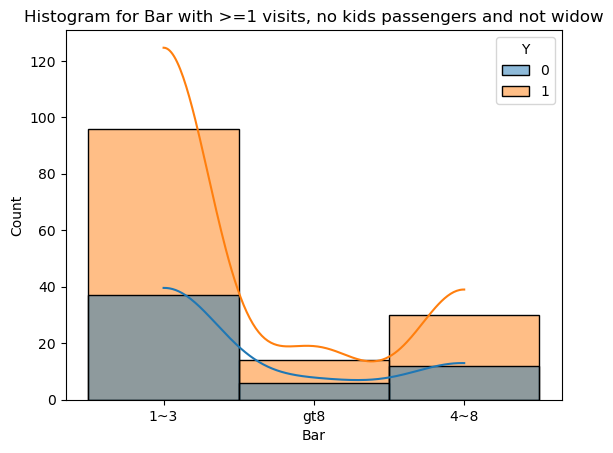

In [423]:
more_than_once = ['1~3','4~8','gt8']
marital_status_to_be_excluded = ['Widowed']
passengers = ['Friends','Partner']
cheap_restaurant_trips = ['4~8','gt8']
group_one = bar_coupons.query('Bar in @more_than_once and passenger in @passengers and maritalStatus not in @marital_status_to_be_excluded')
sns.histplot(data=group_one, x='Bar', hue='Y', kde=True).set(title = 'Histogram for Bar with >=1 visits, no kids passengers and not widow')
plt.savefig("images/bar_hist_9.png")

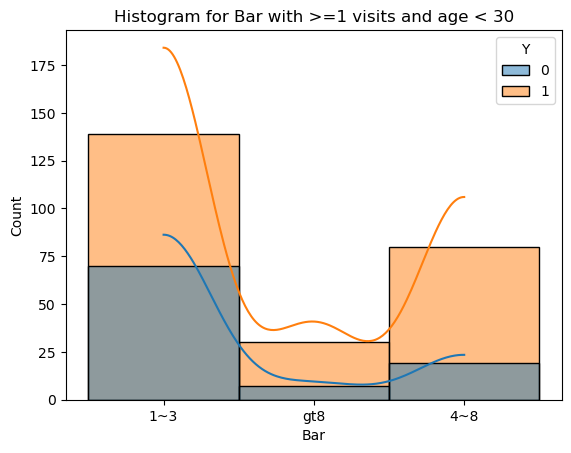

In [424]:
more_than_once = ['1~3','4~8','gt8']
marital_status_to_be_excluded = ['Widowed']
group_two = bar_coupons.query('Bar in @more_than_once and age < 30')
sns.histplot(data=group_two, x='Bar', hue='Y', kde=True).set(title = 'Histogram for Bar with >=1 visits and age < 30')
plt.savefig("images/bar_hist_10.png")

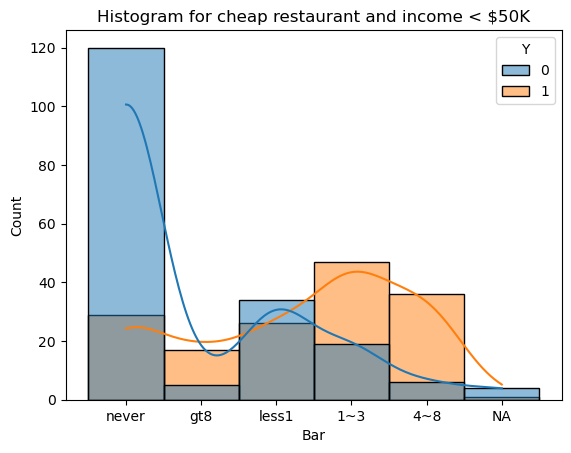

In [425]:
marital_status_to_be_excluded = ['Widowed']
passengers = ['Friends','Partner']
cheap_restaurant_trips = ['4~8','gt8']
group_three = bar_coupons.query('RestaurantLessThan20 in @cheap_restaurant_trips and income < 50000')
sns.histplot(data=group_three, x='Bar', hue='Y', kde=True).set(title = 'Histogram for cheap restaurant and income < $50K')
plt.savefig("images/bar_hist_11.png")

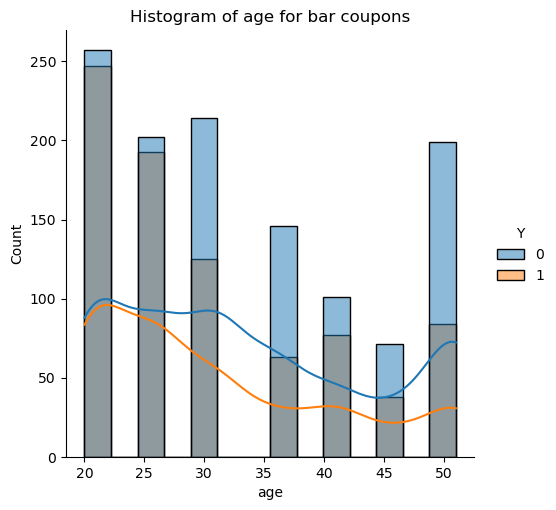

In [426]:
sns.displot(data = bar_coupons, x='age', hue='Y', kde=True).set(title = 'Histogram of age for bar coupons')
plt.savefig("images/bar_hist_12.png")

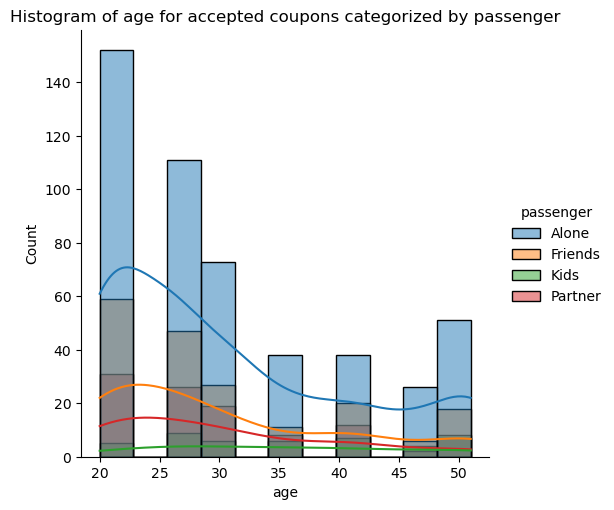

In [427]:
sns.displot(data = bar_coupons.query('Y ==1'), x='age', hue='passenger', kde=True).set(title = 'Histogram of age for accepted coupons categorized by passenger')
plt.savefig("images/bar_hist_13.png")

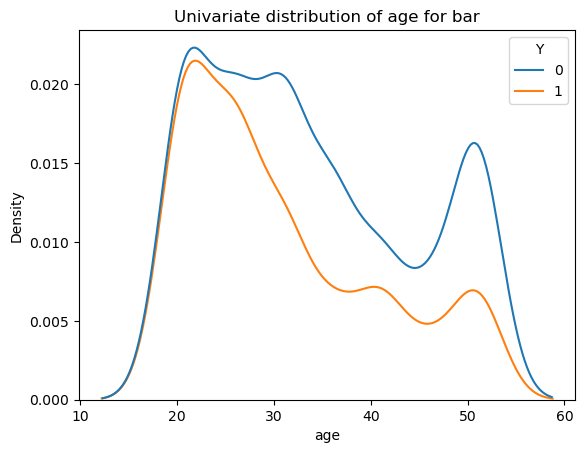

In [428]:
sns.kdeplot(data=bar_coupons, x='age', hue='Y').set(title = 'Univariate distribution of age for bar')
plt.savefig("images/bar_age_kde_1.png")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

We could draw following hypothesis based on above analysis of data
* People of age < 25 generally tend to accept more bar coupons.
* People visitng bar more (>=1) tend to accept more coupons compared to people visiting less (never, less1).
* Of course people visitng bar who accepts bar coupons generally travel lowest with kids.
* People having income < 50K visiting cheap restaurants accepts more coupon when they visit more than once.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Investing Coffee House

Lets see what coffee house reveals with respect to the analysis.

First lets create a DF containing only coffee house data

In [429]:
coffee_house_coupons = data.query('coupon == "Coffee House"')
coffee_house_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friends,Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,NA,never,never,NA,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,NA,never,never,NA,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,NA,never,never,NA,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kids,Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,NA,never,never,NA,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,NA,never,never,NA,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,1,Bachelors degree,Business & Financial,100000,NA,less1,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,1,Bachelors degree,Business & Financial,100000,NA,less1,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Sales & Related,75000,NA,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Sales & Related,75000,NA,never,never,1~3,4~8,1~3,1,1,0,0,1,0


Lets see how many coffee house coupons are accepted compared to total.

In [430]:
coffee_house_coupons.query('Y == 1')['Y'].count()/ coffee_house_coupons['Y'].count()

0.49924924924924924

~50% of the population accepts coffee house coupons

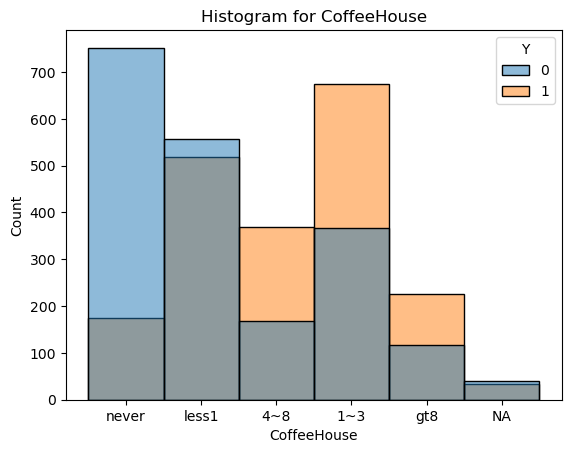

In [431]:
sns.histplot(data=coffee_house_coupons, x='CoffeeHouse', hue='Y').set(title = 'Histogram for CoffeeHouse')
plt.savefig("images/coffee_house_hist_1.png")

In [432]:
less_than_eq3 = ['never','less1','1~3']
people_who_went_leq3 = coffee_house_coupons.query('CoffeeHouse in @less_than_eq3')
acceptance_rate_for_leq3 = people_who_went_leq3.query('Y == 1')['Y'].count()  / coffee_house_coupons.query('Y == 1')['Y'].count()
print(acceptance_rate_for_leq3)

more_than_3 = ['4~8','gt8']
people_who_went_gt3 = coffee_house_coupons.query('CoffeeHouse in @more_than_3')
acceptance_rate_for_gt3 = people_who_went_gt3.query('Y == 1')['Y'].count()  / coffee_house_coupons.query('Y == 1')['Y'].count()
print(acceptance_rate_for_gt3)

0.6857142857142857
0.29774436090225564


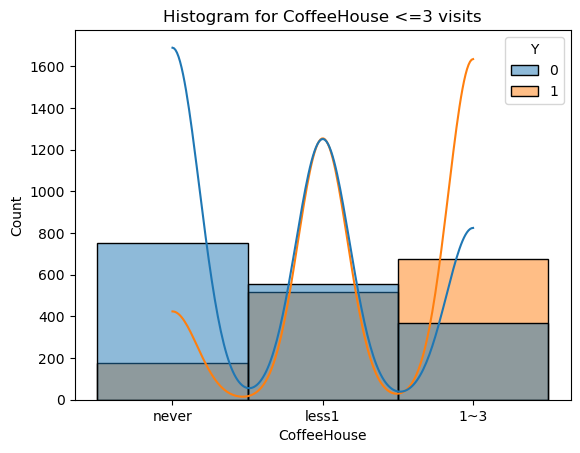

In [433]:
less_than_eq3 = ['never','less1','1~3']
people_who_went_leq3 = coffee_house_coupons.query('CoffeeHouse in @less_than_eq3')
sns.histplot(data=people_who_went_leq3, x='CoffeeHouse', hue='Y', kde=True).set(title = 'Histogram for CoffeeHouse <=3 visits')
plt.savefig("images/coffee_house_hist_2.png")

As we can see above, 68% of the population accepted coupons when visiting coffee house <= 3 times in a month. More than 3 times is 29%

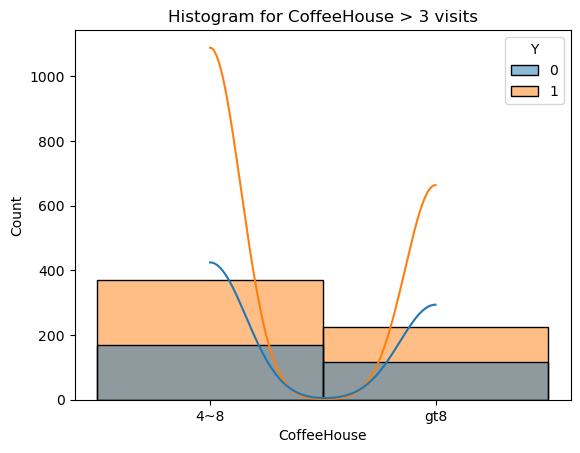

In [434]:
more_than_3 = ['4~8','gt8']
people_who_went_gt3 = coffee_house_coupons.query('CoffeeHouse in @more_than_3')
sns.histplot(data=people_who_went_gt3, x='CoffeeHouse', hue='Y', kde=True).set(title = 'Histogram for CoffeeHouse > 3 visits')
plt.savefig("images/coffee_house_hist_3.png")

As we can see in the above distributions, coupons seems to be accepted higer when the person vists CoffeeHouse >=1

Next we would like to see how the age demography classifies the data. Lets see for crowd less than 25 years old and more than 25.

In [435]:
people_more_25 = coffee_house_coupons.query('age >= 25')
people_more_25_acceptance_ratio = people_more_25.query('Y == 1')['Y'].count() / coffee_house_coupons.query('Y == 1')['Y'].count()
print(people_more_25_acceptance_ratio)

people_below_25 = coffee_house_coupons.query('age < 25')
people_below_25_acceptance_ratio = people_below_25.query('Y == 1')['Y'].count() / coffee_house_coupons.query('Y == 1')['Y'].count()
print(people_below_25_acceptance_ratio)

0.7137844611528822
0.2862155388471178


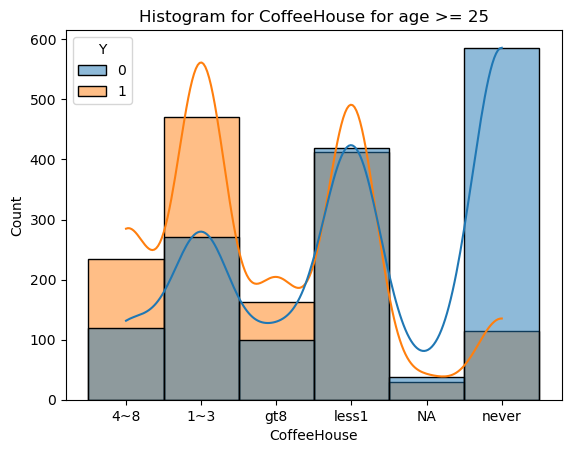

In [436]:
people_more_25 = coffee_house_coupons.query('age >= 25')
sns.histplot(data=people_more_25, x='CoffeeHouse', hue='Y', kde=True).set(title = 'Histogram for CoffeeHouse for age >= 25')
plt.savefig("images/coffee_house_hist_4.png")

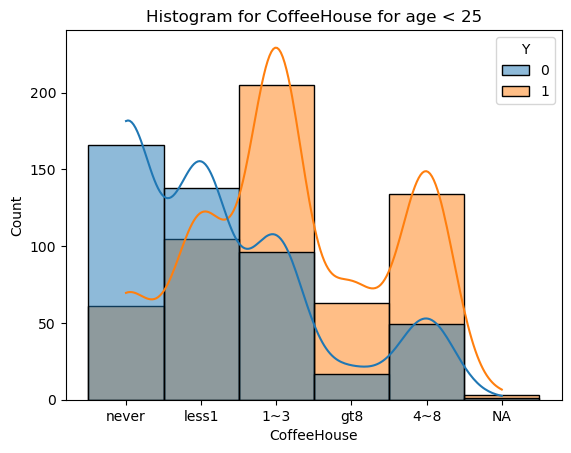

In [437]:
people_below_25 = coffee_house_coupons.query('age < 25')
sns.histplot(data=people_below_25, x='CoffeeHouse', hue='Y', kde=True).set(title = 'Histogram for CoffeeHouse for age < 25')
plt.savefig("images/coffee_house_hist_5.png")

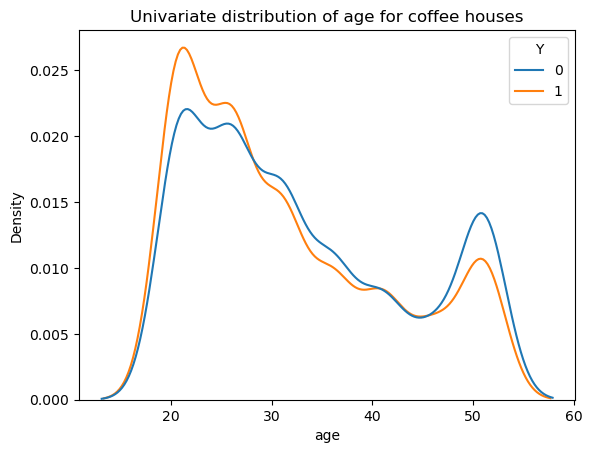

In [438]:
sns.kdeplot(data=coffee_house_coupons, x='age', hue='Y').set(title = 'Univariate distribution of age for coffee houses')
plt.savefig("images/coffee_house_age_kde_1.png")

From the analysis, we could see that people below 71% of the overall population accepting coupons are of people who are >= 25 years. Also, we can see that data is distributed in such manner that age group between 20 and 30 is highest.

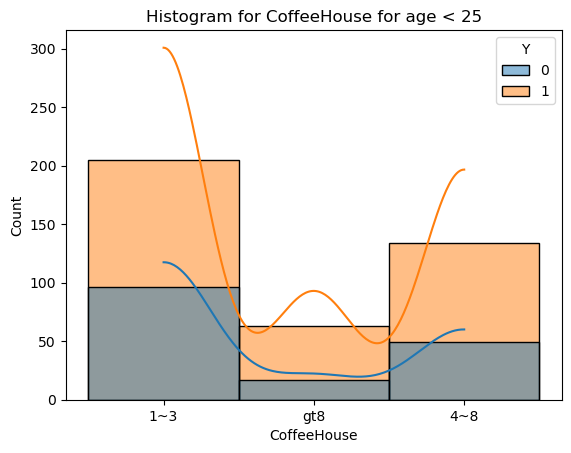

In [439]:
more_than_once = ['1~3','4~8','gt8']
sns.histplot(data=coffee_house_coupons.query('CoffeeHouse in @more_than_once and age < 25'), x='CoffeeHouse', hue='Y', kde=True).set(title = 'Histogram for CoffeeHouse for age < 25')
plt.savefig("images/coffee_house_hist_6.png")

As we can see in the above histogram, people below 25 tend to use coupons more when visiting CoffeeHouse more than once.

[Text(0.5, 1.0, 'Histogram for CoffeeHouse with visit >=1, no kids passengers and not widowed')]

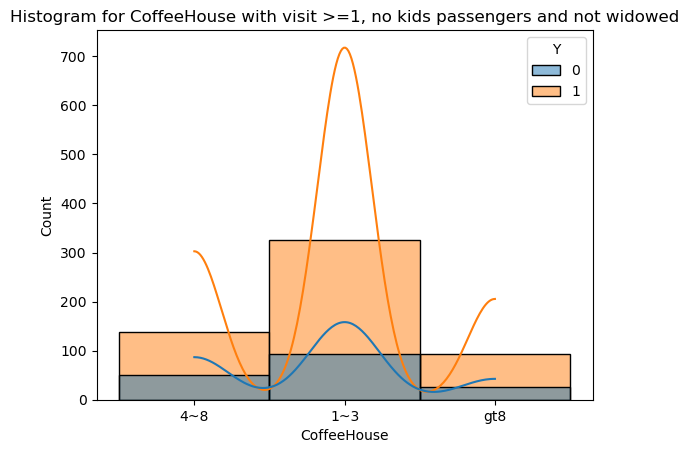

In [440]:
more_than_once = ['1~3','4~8','gt8']
marital_status_to_be_excluded = ['Widowed']
passengers = ['Friends','Partner']
group_one = coffee_house_coupons.query('CoffeeHouse in @more_than_once and passenger in @passengers and maritalStatus not in @marital_status_to_be_excluded')
sns.histplot(data=group_one, x='CoffeeHouse', hue='Y', kde=True).set(title = 'Histogram for CoffeeHouse with visit >=1, no kids passengers and not widowed')

[Text(0.5, 1.0, 'Histogram for CoffeeHouse with visit >=1 and age < 30')]

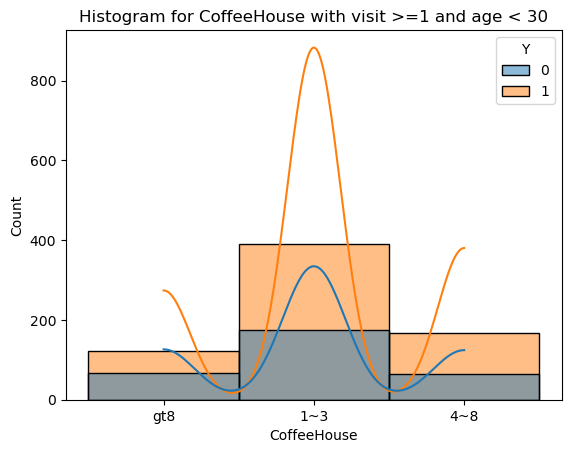

In [441]:
more_than_once = ['1~3','4~8','gt8']
group_two = coffee_house_coupons.query('CoffeeHouse in @more_than_once and age < 30')
sns.histplot(data=group_two, x='CoffeeHouse', hue='Y', kde=True).set(title = 'Histogram for CoffeeHouse with visit >=1 and age < 30')

[Text(0.5, 1.0, 'Histogram for cheap restaurants with income < 50K')]

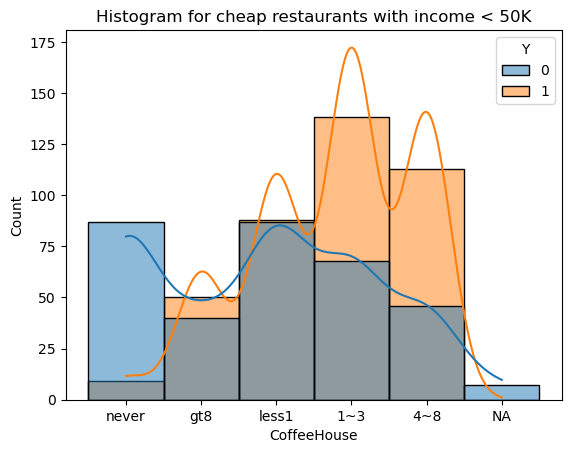

In [442]:
cheap_restaurant_trips = ['4~8','gt8']
group_three = coffee_house_coupons.query('RestaurantLessThan20 in @cheap_restaurant_trips and income < 50000')
sns.histplot(data=group_three, x='CoffeeHouse', hue='Y', kde=True).set(title = 'Histogram for cheap restaurants with income < 50K')

In [443]:
more_than_once = ['1~3','4~8','gt8']
marital_status_to_be_excluded = ['Widowed']
passengers = ['Friends','Partner']
cheap_restaurant_trips = ['4~8','gt8']
group_one = coffee_house_coupons.query('CoffeeHouse in @more_than_once and passenger in @passengers and maritalStatus not in @marital_status_to_be_excluded')
group_one_acceptance_ratio = group_one.query('Y == 1')['Y'].count() / coffee_house_coupons.query('Y == 1')['Y'].count()
print(group_one_acceptance_ratio)

group_two = coffee_house_coupons.query('CoffeeHouse in @more_than_once and age < 30')
group_two_acceptance_ratio = group_two.query('Y == 1')['Y'].count() / coffee_house_coupons.query('Y == 1')['Y'].count()
print(group_two_acceptance_ratio)

group_three = coffee_house_coupons.query('RestaurantLessThan20 in @cheap_restaurant_trips and income < 50000')
group_three_acceptance_ratio = group_three.query('Y == 1')['Y'].count() / coffee_house_coupons.query('Y == 1')['Y'].count()
print(group_three_acceptance_ratio)

0.2781954887218045
0.34035087719298246
0.19949874686716793


Like the previous bar coupon analysis, the coffee house coupon is also revealing similar hypothesis:
* Age group below 25 tend to visit coffee houses more and accepts coffee house coupons.
* Acceptance of coupons is higher for visits more than once compared to less visits.
* Of course, share of people visiting with passengers other than kids is higher than people visiting with kids.

### Conclusion

So from the above 2 feature analysis, we can say that both outcomes are quite similar. Based on these sole observation, we can conclude following:
* People of age group below 25 tend to accept more coupons. We can offer that age group more coupons.
* People with partners, friends should be targeted more when displaying coupons.
* Of course, people visiting more than once tend to accept coupons more (bar, coffee house, etc.)

Next steps after the above analysis we can follow are as follows:
* Analyze the pending coupon features (retaurants (Cheap & expensive) & carry outs)
* We should consider analyzing direction features to see how they impact the final choice.